![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://moneytothemasses.com/wp-content/uploads/2010/09/house-price.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Linear Regression Modelling

The `housing` problem.

We want to predict average house values in the suburbs of Boston.

<i>
> Dataset source: https://archive.ics.uci.edu/ml/datasets/Housing
</i>

### Dataset attribute information

1. **CRIM**: per capita crime rate by town 
2. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. **INDUS**: proportion of non-retail business acres per town 
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. **NOX**: nitric oxides concentration (parts per 10 million) 
6. **RM**: average number of rooms per dwelling 
7. **AGE**: proportion of owner-occupied units built prior to 1940 
8. **DIS**: weighted distances to five Boston employment centres 
9. **RAD**: index of accessibility to radial highways 
10. **TAX**: full-value property-tax rate per \$10,000
11. **PTRATIO**: pupil-teacher ratio by town 
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. **LSTAT**: % lower status of the population 
14. **MEDV**: Median value of owner-occupied homes in \$1000's

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

## Hands on! 

On that section you will analyze the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import time

import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

# import warnings
# warnings.filterwarnings('ignore')

### Loading data

In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston()

df = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df['MEDV'] = boston_data['target']

#df = pd.read_csv('BostonData.csv', sep=',')

print(df.shape)

df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## Data analysis

### Descriptive analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Data normalization (standarization)

Data don't follow the same scale, so we can standarize the data to show all data with the same scale.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

http://scikit-learn.org/stable/modules/preprocessing.html

First separate numeric and string columns:

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = df.select_dtypes(include=numerics)
print('Numeric columns: {}'.format(numeric_cols.columns))

string_cols = df.select_dtypes(exclude=numerics)
print('String columns: {}'.format(string_cols.columns))

Numeric columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
String columns: Index([], dtype='object')


Scale numeric columns using the following formula on numeric columns: $$ \frac{(X_i - \mu)}{\sigma} $$

In [6]:
numeric_cols = (numeric_cols - numeric_cols.mean()) / numeric_cols.std() 

numeric_cols.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


Join again numeric and string columns:

In [7]:
df_norm = string_cols.join(numeric_cols)

df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


### Boxplots

First plot using the normal data, without standarization:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

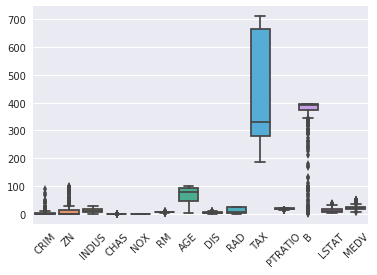

In [8]:
sns.boxplot(data=df[:-1])
plt.xticks(rotation=45)

Now plot the same boxplots using the standarized data. With the normalized data we have now uniform ranges of data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

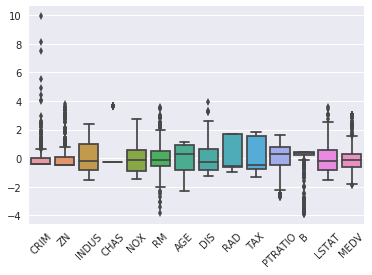

In [9]:
sns.boxplot(data=df_norm)
plt.xticks(rotation=45)

### Target TotalDelay distribution

We can plot target column distribution:

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


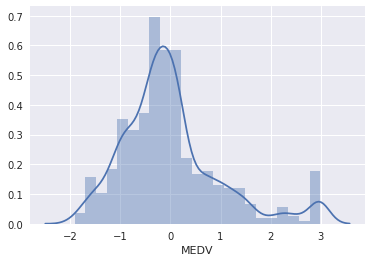

In [10]:
sns.distplot(numeric_cols['MEDV'])

### Correlations

We can see if any column is highly correlated with other column:

In [11]:
df_norm.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


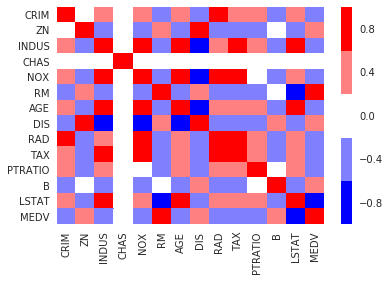

In [12]:
# correlation heatmap
cmap = plt.cm.get_cmap("bwr",lut=5) 

sns.heatmap(df_norm.corr().values, vmin=-1., vmax=1.,
            cmap=cmap,
            xticklabels=list(df_norm.columns),
            yticklabels=list(df_norm.columns))

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

# Modeling

Now we will build models that forecast the _TotalDelay_ using **Scikit Learn (sklearn)**.

## Train/test partitions

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" width=400></img>

- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [13]:
variables = df_norm.columns[ : -1]
X = df_norm[variables].values

target = df_norm.columns[-1]
Y = df_norm[target].values

X[1]

array([-0.41485878, -0.48724019, -0.59279438, -0.27232907, -0.73953036,
        0.19408239,  0.36680343,  0.55660905, -0.86702449, -0.98635338,
       -0.3027945 ,  0.44061589, -0.49195252])

### Standarize the data (_StandardScaler_)

Although our data is already standarized, sklearn provides a method to standarize and scale data. This function applies the same formula we used before, $ \frac{(X_i - \mu)}{\sigma} $.

This _StandardScaler_ method receives as input an array, not a dataframe.

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)
X[1]

array([-0.41526932, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
        0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
       -0.30309415,  0.44105193, -0.49243937])

### Make partitions

We can use the <i>train_test_split</i> function in order to make the split. The _test_size=0.2_ inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [15]:
df.shape

(506, 14)

In [16]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #0.3

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


We have now our data ready, we can now start creating our models.

## What is Overfitting/Underfitting a Model?

### Overfitting

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data.

### Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data.

<img src="https://cdn-images-1.medium.com/max/1600/1*tBErXYVvTw2jSUYK7thU2A.png"></img>

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

## Linear Regression

$$ Y = a.X + b $$

- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print('b: {}'.format(lr.intercept_))
print('a Coefficients: \n', lr.coef_)

b: -0.02496503029629322
a Coefficients: 
 [-0.09208591  0.06799562  0.02224418  0.04831175 -0.18618773  0.36863878
 -0.04949492 -0.28476033  0.23771344 -0.24557504 -0.24658848  0.09297036
 -0.29702884]


Now show the values of each $a$ _coeficient_ of our regression:

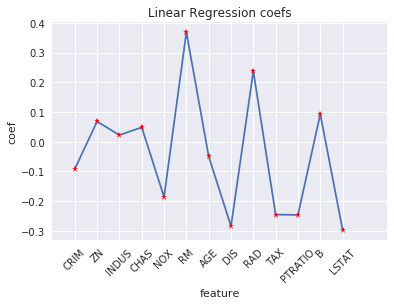

In [19]:
nticks_coefs = len(df_norm.columns) - 1

plt.title('Linear Regression coefs')
plt.xlabel('feature')
plt.ylabel('coef')
plt.xlim(-1, nticks_coefs + 1)
#plt.ylim(-1., 1.)
plt.xticks(range(nticks_coefs), variables, rotation=45)
_ = plt.plot(lr.coef_.reshape(X.shape[1]), '-', lr.coef_.reshape(X.shape[1]), 'r*')

> The plot shows the importance of each variable to predict **MEDV**.

Mean Absolute Error (MAE): 0.3890170013910236
Variance score (R^2): 0.5925003448080675


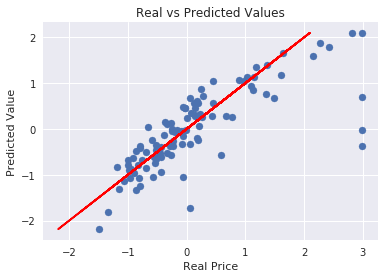

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

Y_pred = lr.predict(X_test)

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('Real Price')
plt.ylabel('Predicted Value')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')

> The more closer blue points are to the red line, the better our prediction is.

### Cross Validation

There you go! Here is a summary of what I did: I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. Seems good, right? But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

We get a more realistic evaluation through **Cross Validation**.

It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

<img src="https://cdn-images-1.medium.com/max/2000/1*4G__SV580CxFj78o9yUXuQ.png" width=600></img>

### K-Folds Cross Validation

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

<img src="https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png" width=600></img>

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn-model-selection-kfold

In [21]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(lr, X_test, Y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))

MAE: [0.49370974 0.44103796 0.42409035]
MAE_mean: 0.45294601588841243


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)